In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

In [9]:
# Loading Cleanest Datasets

benin = pd.read_csv('../data/benin_clean.csv')
sierraleone = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

In [10]:
# Add a country column
benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierraleone'
togo['Country'] = 'Togo'

# Combine into one DataFrame
df_all = pd.concat([benin, sierraleone, togo], ignore_index=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_23784\3266183989.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')
C:\Users\hp\AppData\Local\Temp\ipykernel_23784\3266183989.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')
C:\Users\hp\AppData\Local\Temp\ipykernel_23784\3266183989.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')


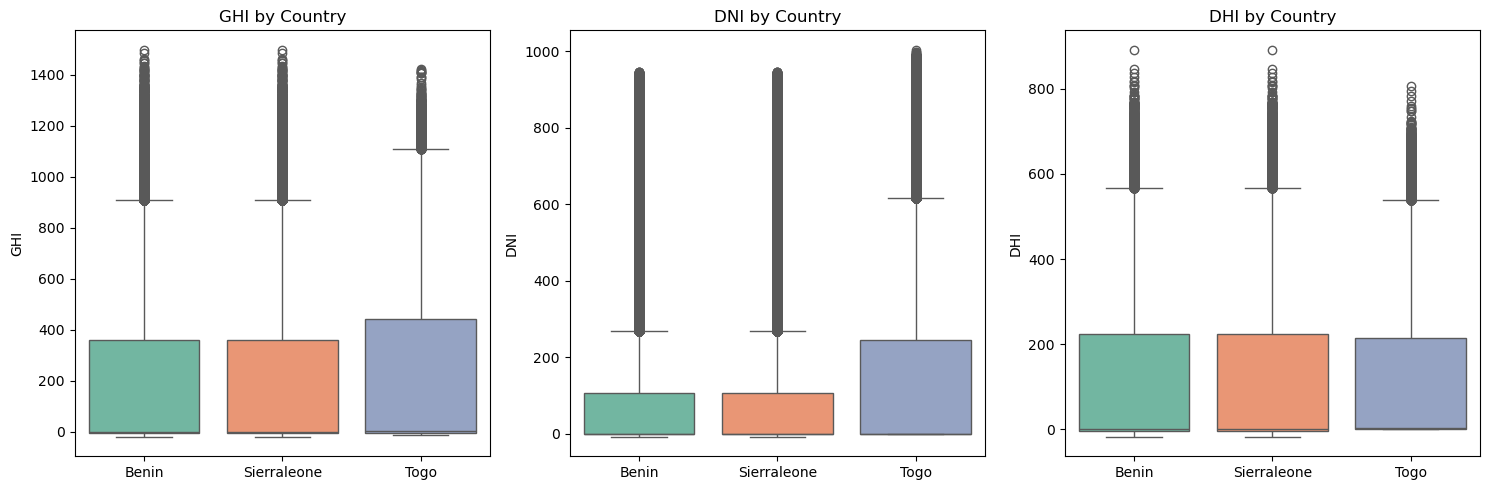

In [11]:
# Boxplots for GHI, DNI, DHI

metrics = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(15,5))

for i, metric in enumerate(metrics,1):
    plt.subplot(1,3,i)
    sns.boxplot(x='Country', y=metric, data=df_all, palette='Set2')
    plt.title(f'{metric} by Country')
    plt.ylabel(metric)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [12]:
# Summary Table (mean, median, std)

summary_table = df_all.groupby('Country')[metrics].agg(['mean','median','std'])
print("Summary Table:")
display(summary_table)

Summary Table:


GHI                            DNI                     \
                   mean median         std        mean median         std   
Country                                                                     
Benin        201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Sierraleone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo         230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                    DHI                     
                   mean median         std  
Country                                     
Benin        113.720571   -0.1  158.946032  
Sierraleone  113.720571   -0.1  158.946032  
Togo         116.444352    2.5  156.520714

In [14]:
# Statistical Testing on GHI

ghi_benin = df_all[df_all['Country']=='Benin']['GHI']
ghi_sl = df_all[df_all['Country']=='Sierraleone']['GHI']
ghi_togo = df_all[df_all['Country']=='Togo']['GHI']

# One-way ANOVA
anova_result = f_oneway(ghi_benin, ghi_sl, ghi_togo)
print(f"ANOVA result for GHI: F = {anova_result.statistic:.2f}, p = {anova_result.pvalue:.4f}")

# If non-normal, you could also use Kruskal-Wallis
kruskal_result = kruskal(ghi_benin, ghi_sl, ghi_togo)
print(f"Kruskal-Wallis result for GHI: H = {kruskal_result.statistic:.2f}, p = {kruskal_result.pvalue:.4f}")


ANOVA result for GHI: F = 1523.05, p = 0.0000
Kruskal-Wallis result for GHI: H = 4780.14, p = 0.0000


C:\Users\hp\AppData\Local\Temp\ipykernel_23784\2017177019.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='Set2')


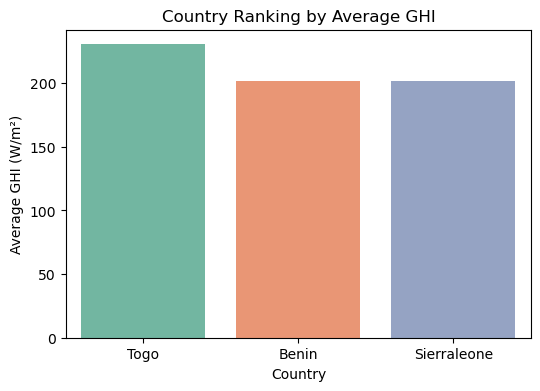

In [15]:
# (Bonus) Bar chart ranking countries by average GHI

avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='Set2')
plt.ylabel('Average GHI (W/m²)')
plt.title('Country Ranking by Average GHI')
plt.show()